# Génération d'un graphe orienté aléatoire avec matrice d'adjacence pondérée

Ce notebook a pour objectif de générer un graphe orienté aléatoire avec une densité contrôlable, pondéré ou non, et d'afficher sa matrice d'adjacence au format exploitable pour notre projet.

Nous utiliserons la bibliothèque **NetworkX** pour la manipulation du graphe, **NumPy** pour les matrices, et **Matplotlib** pour la visualisation.


In [55]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [56]:
def generer_matrice_tournee(n_sommets, densite=0.5, cout_max=10):
    """
    Génère une matrice d'adjacence pour un problème de tournées avec des contraintes.
    Certaines routes sont inaccessibles et certaines routes n'ont pas de lien direct.
    
    n_sommets : nombre de villes ou points dans le problème.
    densite : densité des routes disponibles.
    cout_max : coût maximal d'une route.
    """
    # Initialisation de la matrice avec 0 (pas de lien entre les points)
    matrice = np.zeros((n_sommets, n_sommets), dtype=int)
    
    # Remplir la matrice avec des coûts aléatoires dans les contraintes données
    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):
            if random.random() < densite:
                cout = random.randint(1, cout_max)
                matrice[i][j] = cout
                matrice[j][i] = cout  # Graphe non orienté

    # Rendre certaines routes inaccessibles (valeur -1)
    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):
            if random.random() < 0.1:  # 10% de chance qu'une route soit inaccessible
                matrice[i][j] = -1
                matrice[j][i] = -1  # Graphe non orienté

    # S'assurer que les éléments diagonaux soient -1 (pas de boucle)
    np.fill_diagonal(matrice, -1)
    
    return matrice


### Génération de la matrice d'adjacence

La fonction **`generer_matrice_tournee`** crée une matrice d'adjacence représentant les routes entre les villes ou points du problème. Voici comment cela fonctionne :

- **`n_sommets`** : Le nombre de villes ou points dans le problème.
- **`densite`** : La probabilité qu'une route existe entre deux points. Plus la densité est élevée, plus il y a de routes possibles.
- **`cout_max`** : Le coût maximal d'une route. Chaque route ayant un coût aléatoire compris entre 1 et `cout_max`.

La matrice est d'abord remplie de zéros, puis des coûts sont attribués entre les points en fonction de la densité. Ensuite, certaines routes sont rendues inaccessibles avec un coût de `-1`, et enfin, les éléments diagonaux (auto-liens) sont également définis à `-1`.


In [57]:
def afficher_matrice_liste(matrice):
    """
    Affiche la matrice sous forme de liste dans le format spécifié.
    """
    print("[")
    for ligne in matrice:
        # Convertir les éléments en int avant d'afficher
        print("    " + str(list(map(int, ligne))) + ",")
    print("]")


### Affichage de la matrice sous forme de liste

Cette fonction **`afficher_matrice_liste`** permet d'afficher la matrice d'adjacence sous forme de liste. Elle parcourt chaque ligne de la matrice, convertit les éléments en entiers (pour une meilleure lisibilité), et affiche la matrice dans un format adapté.


In [58]:
def afficher_graphe(matrice):
    """
    Affiche un graphe basé sur la matrice d'adjacence.
    """
    G = nx.Graph()

    # Ajouter les arêtes à partir de la matrice d'adjacence
    n_sommets = len(matrice)
    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):
            if matrice[i][j] > 0:  # Ignorer les -1 et les 0 (pas de lien)
                G.add_edge(i, j, weight=matrice[i][j])

    # Positionnement des sommets pour l'affichage
    pos = nx.spring_layout(G, seed=42)

    # Affichage du graphe
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
    
    # Affichage des poids des arêtes
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.title("Graphe de la matrice d'adjacence")
    plt.show()


### Affichage du graphe

La fonction **`afficher_graphe`** prend la matrice d'adjacence et l'affiche sous forme de graphe visuel. Voici les étapes :

1. Un objet graphe est créé à partir de **`networkx`**.
2. Les arêtes sont ajoutées en fonction des liens présents dans la matrice (valeurs supérieures à zéro).
3. Les sommets sont positionnés de manière esthétique grâce à **`spring_layout`**.
4. Le graphe est affiché avec **`matplotlib`**, et les poids des arêtes (coûts) sont également affichés pour plus de clarté.


[
    [-1, 1, 1, 0, 8, 0],
    [1, -1, 4, 1, 0, 5],
    [1, 4, -1, 0, 0, 6],
    [0, 1, 0, -1, 9, 9],
    [8, 0, 0, 9, -1, -1],
    [0, 5, 6, 9, -1, -1],
]


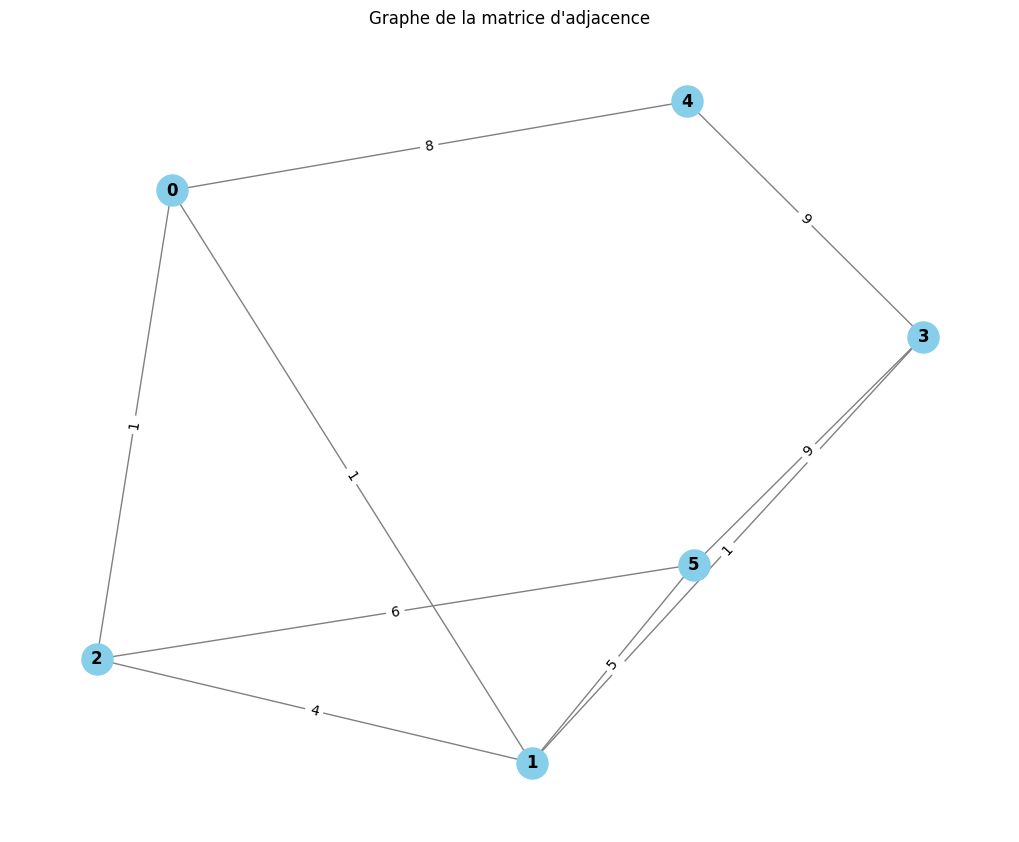

In [59]:
# Exemple d'utilisation
n_sommets = 6
matrice = generer_matrice_tournee(n_sommets, densite=0.5)
afficher_matrice_liste(matrice)

# Afficher le graphe
afficher_graphe(matrice)


### Exemple d'utilisation

Enfin, cette cellule montre un exemple d'utilisation des fonctions créées :

- **`generer_matrice_tournee`** est appelée pour créer une matrice avec 6 sommets et une densité de 50% pour les routes.
- **`afficher_matrice_liste`** est utilisée pour afficher la matrice sous forme de liste.
- **`afficher_graphe`** est ensuite appelée pour afficher graphiquement le graphe des villes et de leurs connexions.

Cela permet de visualiser à la fois la matrice d'adjacence et le graphe associé, ce qui est utile pour analyser les liens entre les points du problème.
